**Project Introduction & Overview:**

This project explores function approximation using polynomial regression and k-Nearest Neighbors (k-NN) regression on noisy data. Polynomial regression is used to capture the global structure of the data, while k-NN serves as a non-parametric method to model local patterns.

We compare the performance of lower- and higher-order polynomials and different k values in k-NN to evaluate their ability to reconstruct the underlying trend. The analysis highlights that polynomial regression produces smooth and reliable predictions, whereas k-NN is more sensitive to noise and local fluctuations, illustrating the trade-offs between parametric and non-parametric approaches.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

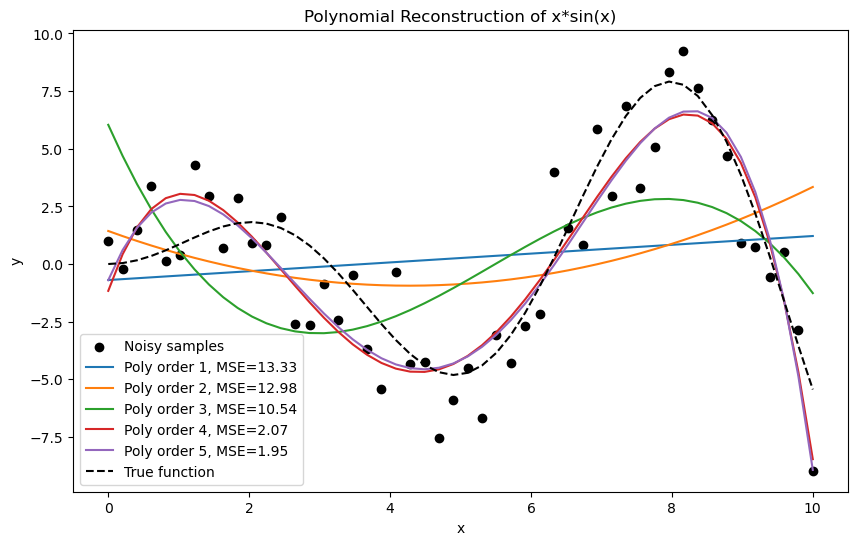

Best polynomial order: 5 with MSE = 1.95


In [7]:
#Sample the function with noise
np.random.seed(42)
N = 50
x = np.linspace(0, 10, N)
y_true = x * np.sin(x)
noise = np.random.normal(0, 2, N)
y_noisy = y_true + noise

#Fit polynomials of order 1 to 5
orders = [1, 2, 3, 4, 5]
plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label='Noisy samples', color='black')

best_order = None
lowest_mse = float('inf')

for order in orders:
    poly = PolynomialFeatures(degree=order)
    X_poly = poly.fit_transform(x.reshape(-1,1))
    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y_true, y_pred)
    if mse < lowest_mse:
        lowest_mse = mse
        best_order = order
    plt.plot(x, y_pred, label=f'Poly order {order}, MSE={mse:.2f}')

plt.plot(x, y_true, 'k--', label='True function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Reconstruction of x*sin(x)')
plt.show()

print(f"Best polynomial order: {best_order} with MSE = {lowest_mse:.2f}")

**Observation:**

From the plot, the lower-order polynomials (degrees 1–3) clearly underfit the data because they fail to capture the oscillating pattern of the true function. 

The 4th and 5th-order models follow the shape much more closely, with the 5th-order polynomial giving the lowest MSE (1.95). This shows that higher-order polynomials handle the nonlinear behavior better and reconstruct the underlying function more accurately despite the noise.

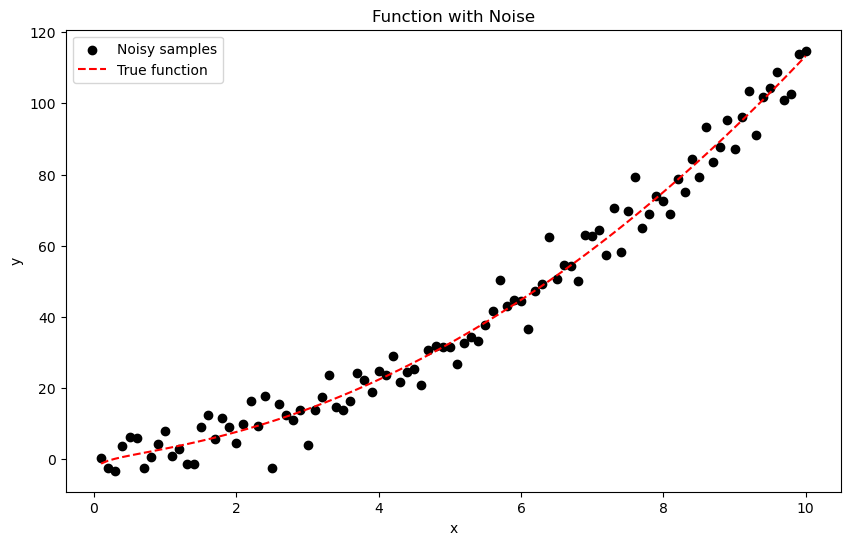

In [9]:
from sklearn.neighbors import KNeighborsRegressor

#Sample function
x = np.linspace(0.1, 10, 100)  # avoid log(0)
y_true = 1 + x + x**2 + np.log(x)
noise = np.random.normal(0, 5, 100)
y_noisy = y_true + noise

plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label='Noisy samples', color='black')
plt.plot(x, y_true, 'r--', label='True function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Noise')
plt.legend()
plt.show()

#Prepare polynomial features (up to degree 2 works best here)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1,1))
lin_model = LinearRegression()
lin_model.fit(X_poly, y_noisy)
y_poly_pred = lin_model.predict(X_poly)


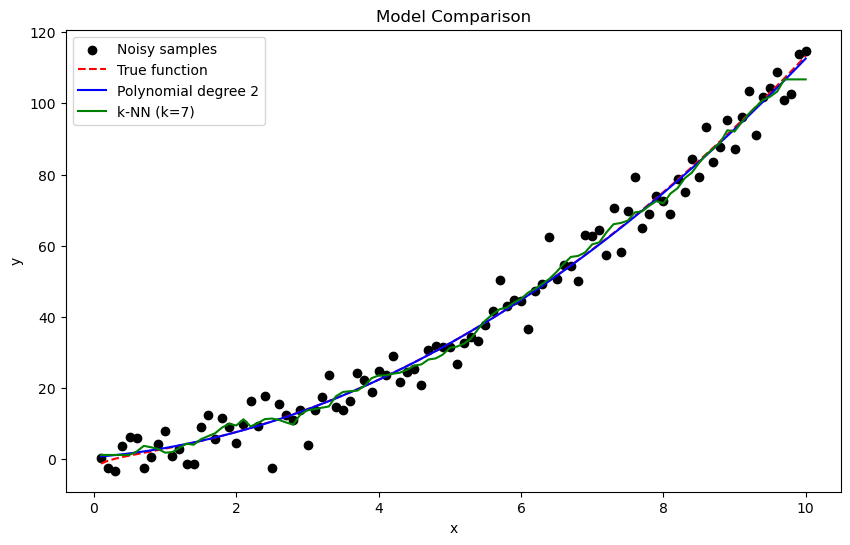

In [11]:
#k-NN model
best_k = 0
lowest_mse = float('inf')
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x.reshape(-1,1), y_noisy)
    y_knn_pred = knn.predict(x.reshape(-1,1))
    mse = mean_squared_error(y_true, y_knn_pred)
    if mse < lowest_mse:
        lowest_mse = mse
        best_k = k

knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(x.reshape(-1,1), y_noisy)
y_knn_pred = knn_best.predict(x.reshape(-1,1))

#Plot comparison
plt.figure(figsize=(10,6))
plt.scatter(x, y_noisy, label='Noisy samples', color='black')
plt.plot(x, y_true, 'r--', label='True function')
plt.plot(x, y_poly_pred, 'b', label='Polynomial degree 2')
plt.plot(x, y_knn_pred, 'g', label=f'k-NN (k={best_k})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Comparison')
plt.legend()
plt.show()

**Summary:**

The function 1+x+x2+log(x) was evaluated over the interval and plotted, and 100 noisy samples were generated by adding normally distributed noise to simulate real data variability. 

Polynomial regression and k-NN regression were then applied to reconstruct the underlying function from these noisy observations. A polynomial model was selected because the true function contains a dominant quadratic component, making a degree-2 polynomial well-suited to capturing its smooth global shape. 

The k-NN model was included as a non-parametric alternative, and values of k from 1 to 20 were tested to identify the optimal neighbourhood size.

**Comparison:**

The polynomial regression model produced a smooth curve that closely matched the true function and generalized well despite the added noise. In contrast, the k-NN model followed the trend but was more sensitive to local noise, resulting in a less stable and less smooth reconstruction. 

The comparison plot clearly shows that the polynomial model aligns more strongly with the ground-truth function, while k-NN fluctuates more due to its local, data-driven nature. 

Overall, the degree-2 polynomial model provided the most accurate and reliable reconstruction of the function.